In [1]:
pip install opencv-python


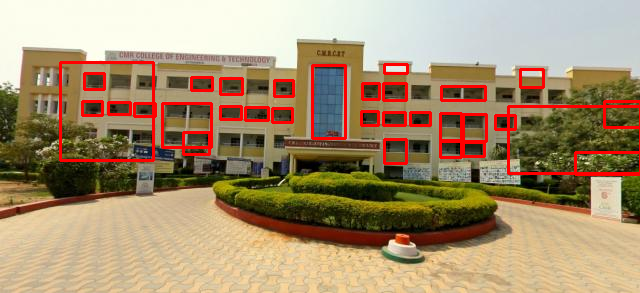

In [4]:
import cv2
from google.colab.patches import cv2_imshow  # Use this for displaying images in Colab

# Load the image
image_path = '/content/1547211911phptODUbj_g.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours and identify cracks based on area
min_crack_area = 100  # Adjust as needed
for contour in contours:
    if cv2.contourArea(contour) > min_crack_area:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Draw a red rectangle around the crack

# Display the image with detected cracks using cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

